# Importando módulos 

In [54]:
import obspy
from obspy.taup import TauPyModel

from multiprocessing import Pool
from obspy import read,UTCDateTime,Trace
from obspy.clients.fdsn import Client
import os
import glob
import shutil
import numpy as np
from collections import defaultdict
import pandas as pd

#para plotar as figuras
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition,inset_axes
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, HourLocator, MinuteLocator, SecondLocator, DateFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.gridspec as gridspec

from datetime import datetime,timedelta,date
from tqdm import tqdm

from shapely.geometry.polygon import LinearRing

import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Inputs e Outputs

In [62]:
FOLDER_OUTPUT = '/home/dIOGOLOC/dados_posdoc/gliders_project/OUTPUT/'

WAV_INPUT = "/medata02/HDs_01.04.22/"

WAV_OUT = "/home/dIOGOLOC/dados_posdoc/gliders_project/EVENT_WAV/"

MSEED_INPUT = "/home/dIOGOLOC/dados_posdoc/glider_ON_petrobras/data/"

EVENTs_DATA_FOLDER = '/home/dIOGOLOC/Documents/codes_marefone/EVENT_MSEED/'

SELECT_EVENTs_DATA_FOLDER = '/home/dIOGOLOC/Documents/codes_marefone/EVENT_MSEED_SEL/'

EVENTs_GLIDER_CSV = "/run/media/dIOGOLOC/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/gliders_project/gliders_data/info_csv/events_glider.csv"

# Extraindo informações dos arquivos ".wav"

In [4]:
file_list_wav = sorted([root+'/'+file for root, dirs, files in os.walk(WAV_INPUT) for file in files if file.endswith('.wav')])

NameError: name 'file_list_log' is not defined

In [49]:
hds = []
for i in file_list_wav:
            hds.append(i)

In [50]:
event_lst_glider = pd.read_csv(EVENTs_GLIDER_CSV,delimiter='\t',header=0)

In [51]:
event_lst_glider

,id,filename,mergulho,stream,data
0,0,pa0124au_039_151128_054946,124,39,2015-11-28T05:50:15.000000Z
1,1,pa0164au_034_160127_151709,164,34,2016-01-27T15:17:20.000000Z
2,2,pa0561au_038_160410_072014,561,38,2016-04-10T07:22:06.000000Z
3,3,160910_123740_pa0108au_034,108,34,2016-09-10T12:39:14.000000Z
4,4,161104_162325_pa0071au_003,71,3,2016-11-04T16:26:05.000000Z
5,5,170302_112009_pa0097au_037,97,37,2017-03-02T11:20:58.000000Z
6,6,170415_082252_pa0190au_038,190,38,2017-04-15T08:24:17.000000Z
7,7,170428_160834_pa0286au_025,286,25,2017-04-28T16:11:20.000000Z
8,8,170614_073756_pa0050au_014,50,14,2017-06-14T07:39:16.000000Z
9,9,170622_123959_pa0083au_053,83,53,2017-06-22T12:41:03.000000Z


In [56]:
event_wav_files = []
for i in event_lst_glider['filename']:
    a = [k for k in hds if i in k]
    if len(a) > 0:
        event_wav_files.append(a[0])

In [57]:
event_wav_files

['/medata02/HDs_01.04.22/HD_01/PAM_20151220_SG618_C1/w/pa0124au_039_151128_054946.wav',
 '/medata02/HDs_01.04.22/HD_01/PAM_20160205_SG618_C2/w/pa0164au_034_160127_151709.wav',
 '/medata02/HDs_01.04.22/HD_02/PROOCEANO/PAM_20160425_SG612_C3/pa0561au_038_160410_072014.wav',
 '/medata02/HDs_01.04.22/HD_01/PAM_20160919_SG612_C6/160910_123740_pa0108au_034.wav',
 '/medata02/HDs_01.04.22/HD_01/PAM_20161124_SG612_C8/161104_162325_pa0071au_003.wav',
 '/medata02/HDs_01.04.22/HD_06/11CICLO/170302_112009_pa0097au_037.wav',
 '/medata02/HDs_01.04.22/HD_06/12CICLO/170415_082252_pa0190au_038.wav',
 '/medata02/HDs_01.04.22/HD_06/12CICLO/170428_160834_pa0286au_025.wav',
 '/medata02/HDs_01.04.22/HD_06/15CICLO/170614_073756_pa0050au_014.wav',
 '/medata02/HDs_01.04.22/HD_06/15CICLO/170622_123959_pa0083au_053.wav',
 '/medata02/HDs_01.04.22/HD_06/15CICLO/170630_223548_pa0120au_060.wav',
 '/medata02/HDs_01.04.22/HD_06/16CICLO/170718_131300_pa0031au_046.wav',
 '/medata02/HDs_01.04.22/HD_06/16CICLO/170813_165646

# Copiando dados dos eventos:

In [63]:
for i in event_wav_files:
    eventName = i.split('/')[-1]
    shutil.copyfile(i,WAV_OUT+eventName)

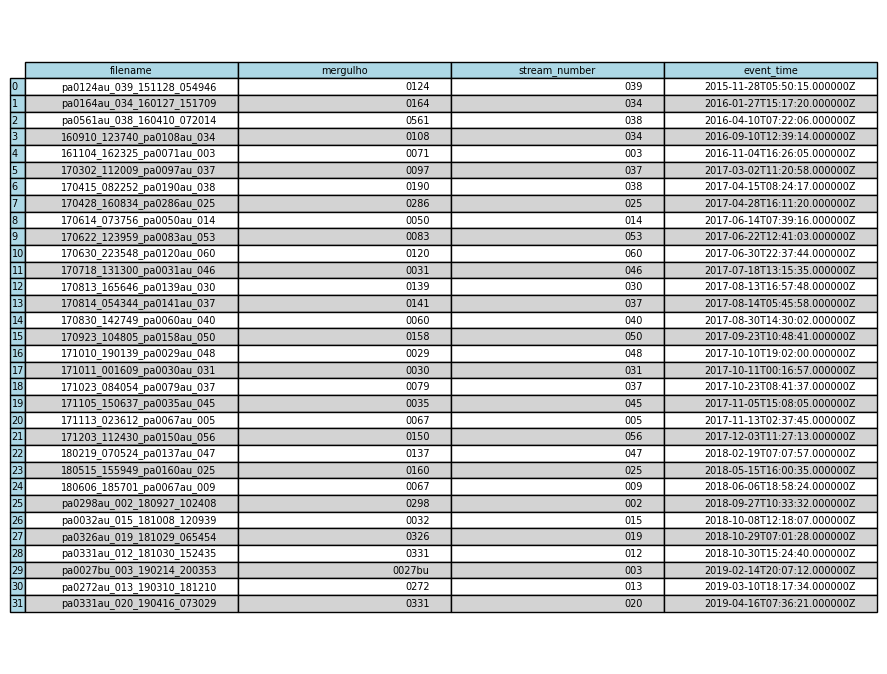

In [28]:
dataframe_to_pdf(dataframe_ev_file_final, 'test_1.pdf')
